In [1]:
import socket    
hostname = socket.gethostname()    
IPAddr = socket.gethostbyname(hostname)    
print("Your Computer Name is:" + hostname)    
print("Your Computer IP Address is:" + IPAddr)

Your Computer Name is:DESKTOP-BE0E817
Your Computer IP Address is:192.168.56.1


In [2]:
import pandas as pd
import numpy as np

In [3]:
    # reading 'csv' dataset
df = pd.read_csv('imdb.csv')
df.head()

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90,Film,R,-,None,None,Severe,None,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97,Film,PG-13,-,None,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155,Film,PG-13,-,None,Moderate,None,Mild,Moderate


## - To Clean The Dataset from unnecessary data, punctuation, and some characters

In [4]:
# To show the all dataset's columns
column_list = []
for col in df.columns:
    column_list.append(col)
print(column_list)

['Name', 'Date', 'Rate', 'Votes', 'Genre', 'Duration', 'Type', 'Certificate', 'Episodes', 'Nudity', 'Violence', 'Profanity', 'Alcohol', 'Frightening']


In [5]:
# To drop the unnecessary columns 
film_series = pd.DataFrame()
film_Series = df.drop(columns=['Certificate','Episodes'], inplace=False)
film_Series.columns

Index(['Name', 'Date', 'Rate', 'Votes', 'Genre', 'Duration', 'Type', 'Nudity',
       'Violence', 'Profanity', 'Alcohol', 'Frightening'],
      dtype='object')

In [6]:
film_Series.info()
print('\ndataFrame Shape : ',film_Series.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6178 entries, 0 to 6177
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         6178 non-null   object
 1   Date         6178 non-null   int64 
 2   Rate         6178 non-null   object
 3   Votes        6178 non-null   object
 4   Genre        6178 non-null   object
 5   Duration     6178 non-null   object
 6   Type         6178 non-null   object
 7   Nudity       6178 non-null   object
 8   Violence     6178 non-null   object
 9   Profanity    6178 non-null   object
 10  Alcohol      6178 non-null   object
 11  Frightening  6178 non-null   object
dtypes: int64(1), object(11)
memory usage: 579.3+ KB

dataFrame Shape :  (6178, 12)


In [7]:
# To Check is there any repetitive row in the dataset.
count = len(film_Series['Name'].unique())
print("count of uniq row : ",count)
repdataCount = film_Series.shape[0]-count
print("Which means ",repdataCount," data are repeats and they need to be deleted.")

count of uniq row :  4820
Which means  1358  data are repeats and they need to be deleted.


In [8]:
 # Drop the repetitive row.
film_Series.drop_duplicates(subset ="Name",
                         keep = 'last', inplace = True)
film_Series.shape[0]

4820

In [9]:
# 'None' means this is empty data and we need to clean them.
film_Series[film_Series['Duration']=='None'][['Duration','Name']]
film_Series['Duration'].replace('None',np.nan, inplace=True)
film_Series.dropna(subset=['Duration'], inplace=True)
film_Series.shape[0]

4581

In [10]:
film_Series.index

Int64Index([   0,    2,    3,    5,    6,    9,   10,   11,   13,   15,
            ...
            6168, 6169, 6170, 6171, 6172, 6173, 6174, 6175, 6176, 6177],
           dtype='int64', length=4581)

In [11]:
# The Indexs of th dataset ara broke when we cleaned the unnecessary datas. And we need to chance it with new index set 
index = pd.Index(range(0,len(film_Series),1))
film_Series = film_Series.set_index(index)

In [12]:
# To clean the 'Name' column in dataset from punctuation
import re

chars_to_remove = "#$&*!.,;?_-:()\/'"
rx = re.escape(''.join(chars_to_remove))
i = 0
for row in film_Series['Name']: 
    film_Series['Name'][i] = re.sub('[%s]' % rx, '', film_Series['Name'][i])
    print(i,"  ",film_Series['Name'][i])
    i = i+1 

0    No Time to Die
1    The Many Saints of Newark
2    Venom Let There Be Carnage
3    Ted Lasso
4    Free Guy
5    Sex Education
6    The Walking Dead
7    The Chestnut Man
8    The Sopranos
9    American Horror Story
10    Seinfeld
11    Greys Anatomy
12    Game of Thrones
13    Black Widow
14    The Last Duel
15    Alice in Borderland
16    ShangChi and the Legend of the Ten Rings
17    Billions
18    Resident Evil Welcome to Raccoon City
19    Spectre
20    Lucifer
21    The Morning Show
22    Halloween Kills
23    Theres Someone Inside Your House
24    Malignant
25    La casa de papel
26    Tick Tick Boom
27    The Night House
28    Succession
29    Skyfall
30    NCIS Naval Criminal Investigative Service
31    See
32    The Addams Family 2
33    Big Sky
34    Peaky Blinders
35    Titane
36    American Crime Story
37    Stranger Things
38    Titans
39    Goliath
40    Breaking Bad
41    On My Block
42    Old
43    Y The Last Man
44    The Rookie
45    No One Gets Out Alive
46    L

c:\users\anil\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



167    Midsommar
168    Spencer
169    Dave Chappelle The Closer
170    The Wheel of Time
171    Avengers Endgame
172    Cyrano
173    Blue Bloods
174    Wrath of Man
175    Community
176    The Duff
177    Family Guy
178    Evil
179    Tenet
180    Survive the Game
181    New Girl
182    Busanhaeng
183    Killing Eve
184    Dark
185    Pretty Smart
186    Heels
187    Stargirl
188    This Is Us
189    Gladiator
190    Kota Factory
191    Escape Room Tournament of Champions
192    The 100
193    GoldenEye
194    The Godfather
195    Rocketman
196    Good Witch
197    Beetle Juice
198    Magnum PI
199    Friendzone
200    The Nightmare Before Christmas
201    Interstellar
202    The Rocky Horror Picture Show
203    Pig
204    The Orville
205    Endeavour
206    Batoru rowaiaru
207    Homeland
208    Halloween
209    Knock Knock
210    The Dark Knight
211    Two and a Half Men
212    The Protégé
213    Parks and Recreation
214    Star Trek Lower Decks
215    One Piece Wan pîsu
216    A 

581    In Time
582    The Social Network
583    Hamilton
584    Queen of the South
585    Power Book III Raising Kanan
586    Injustice
587    Halloween H20 20 Years Later
588    The Big Short
589    Prometheus
590    Project X
591    The Sixth Sense
592    From Russia with Love
593    Never Have I Ever
594    The Good Fight
595    Dear White People
596    Roswell New Mexico
597    Pose
598    Dawsons Creek
599    Nocturnal Animals
600    The Man in the High Castle
601    Mars Attacks
602    The Devil All the Time
603    Sen to Chihiro no kamikakushi
604    Practical Magic
605    Cheers
606    Chilling Adventures of Sabrina
607    The Lost Boys
608    Chaos Walking
609    The Cabin in the Woods
610    Troy
611    Jumanji The Next Level
612    Taxi Driver
613    Spiral From the Book of Saw
614    I Know What You Did Last Summer
615    Tokyo Revengers
616    Motherland Fort Salem
617    Nightcrawler
618    Malcolm in the Middle
619    After We Collided
620    Black Swan
621    Birds of P

1052    Mr Mercedes
1053    Safe House
1054    Harley Quinn
1055    Romeo + Juliet
1056    The Twilight Saga Breaking Dawn  Part 2
1057    Terminator 2 Judgment Day
1058    The Affair
1059    Dead Poets Society
1060    Gremlins
1061    Doctor Who
1062    The Babadook
1063    Idiocracy
1064    Red Sparrow
1065    Stargate Atlantis
1066    Doc Martin
1067    Casino
1068    The Owl House
1069    Life
1070    Flight
1071    Final Destination 3
1072    Office Space
1073    Cruel Summer
1074    Darkest Hour
1075    Lovecraft Country
1076    Salò o le 120 giornate di Sodoma
1077    Interview with the Vampire The Vampire Chronicles
1078    Boku no Hero Academia World Heroes Mission
1079    Law  Order Criminal Intent
1080    The Last Letter from Your Lover
1081    The Intouchables
1082    The Magicians
1083    The Fog
1084    Body of Lies
1085    Boy Meets World
1086    Cidade de Deus
1087    Unfaithful
1088    XMen Origins Wolverine
1089    The Fresh Prince of BelAir
1090    Star Wars Episode 

1423    Serendipity
1424    Passengers
1425    Taken
1426    Willow
1427    LA Confidential
1428    Magnolia
1429    Outlander
1430    Greyhound
1431    Ragnarok
1432    Fauda
1433    Weeds
1434    The Proposal
1435    Zola
1436    Cloverfield
1437    Caligola
1438    Wrong Turn
1439    XMen Apocalypse
1440    Family Law
1441    Disobedience
1442    Portrait de la jeune fille en feu
1443    Austin Powers International Man of Mystery
1444    The Outpost
1445    Rosemarys Baby
1446    The Middle
1447    Legends of the Fall
1448    Live Free or Die Hard
1449    Airplane
1450    Solo A Star Wars Story
1451    Beautiful Boy
1452    White Chicks
1453    Elysium
1454    The Dig
1455    The Crow
1456    Scissor Seven
1457    The Nun
1458    Dirty Dancing
1459    Twister
1460    Anchorman The Legend of Ron Burgundy
1461    Bloodline
1462    Mamma Mia
1463    Sweeney Todd The Demon Barber of Fleet Street
1464    Hugo
1465    The Hitmans Bodyguard
1466    Gangs of New York
1467    Zone 414
1468  

1799    Marcella
1800    Dredd
1801    I Am Number Four
1802    Noah
1803    End of Watch
1804    Cannibal Holocaust
1805    Wanted
1806    La vérité
1807    San Andreas
1808    Thirteen
1809    East of the Mountains
1810    Days of Our Lives
1811    Would You Rather
1812    Harry Brown
1813    I Think You Should Leave with Tim Robinson
1814    Memoirs of a Geisha
1815    The Last Ship
1816    Çukur
1817    A Menina que Matou os Pais
1818    A Nightmare on Elm Street 4 The Dream Master
1819    Groundhog Day
1820    Cuckoo
1821    Upgrade
1822    The Peanut Butter Falcon
1823    The Bill
1824    Paranormal Activity Next of Kin
1825    Masters of Sex
1826    Gilligans Island
1827    Meet Joe Black
1828    The Visit
1829    The Intern
1830    Guns Akimbo
1831    The Haunting in Connecticut
1832    A Tale Dark  Grimm
1833    Indiana Jones and the Kingdom of the Crystal Skull
1834    Snow White and the Huntsman
1835    John Carter
1836    The Valhalla Murders
1837    Friday the 13th Part II

2153    Weird Science
2154    Takt Op Destiny
2155    Tron
2156    Solar Opposites
2157    First Blood
2158    1922
2159    Excalibur
2160    Goosebumps
2161    Perry Mason
2162    Mannix
2163    Ada Twist Scientist
2164    The Bourne Identity
2165    Fractured
2166    Beverly Hills Cop
2167    Resident Evil The Final Chapter
2168    Ragtime
2169    The Belko Experiment
2170    Traffic
2171    National Lampoons Vacation
2172    Gåsmamman
2173    Hunt for the Wilderpeople
2174    Gone in Sixty Seconds
2175    12 Monkeys
2176    A Ghost Story
2177    Paranormal Activity
2178    Jane Eyre
2179    Stowaway
2180    Hudson  Rex
2181    The Losers
2182    Texas Chainsaw 3D
2183    Tag
2184    After Hours
2185    Fear
2186    Porkys
2187    The Rain
2188    Clique
2189    The Purge
2190    Blackhat
2191    Benidorm
2192    October Sky
2193    Murder Mystery
2194    Genius
2195    Mamma Mia Here We Go Again
2196    Kôdo giasu  Hangyaku no rurûshu Code Geass  Lelouch of the Rebellion
2197    The

2637    Thelma
2638    Keeping Up with the Kardashians
2639    Now You See Me 2
2640    Youve Got Mail
2641    Holidate
2642    The Boy
2643    Mowgli
2644    Hercules
2645    High School Musical
2646    House
2647    Buddy Games
2648    American Housewife
2649    Ginger Snaps
2650    My Wife and Kids
2651    The Girl in the Spiders Web
2652    Friday the 13th A New Beginning
2653    The Kings Speech
2654    Blue Mountain State
2655    All Good Things
2656    xXx
2657    Bound
2658    La montaña sagrada
2659    Eden Lake
2660    Osmosis Jones
2661    Shiva Baby
2662    Det som göms i snö
2663    Father of the Bride Part 3 ish
2664    Moonshine
2665    Hill Street Blues
2666    Life in Pieces
2667    The Shallows
2668    Elizabeth
2669    Green Room
2670    The Fighter
2671    Pitch Perfect 3
2672    Pushing Daisies
2673    2 Fast 2 Furious
2674    We Can Be Heroes
2675    Anchorman 2 The Legend Continues
2676    Gifted
2677    Master of None
2678    Tears of the Sun
2679    Humans
2680

2986    Tully
2987    Just Shoot Me
2988    Them
2989    Turner  Hooch
2990    Happiest Season
2991    ReAnimator
2992    The Virgin Suicides
2993    Bad Teacher
2994    Malcolm X
2995    Body of Proof
2996    The Poison Rose
2997    Broken Arrow
2998    Addams Family Reunion
2999    Le pacte des loups
3000    Den som dræber  Fanget af mørket
3001    Per qualche dollaro in più
3002    The Campaign
3003    Rambo First Blood Part II
3004    Tango  Cash
3005    Insomnia
3006    The Spy Who Dumped Me
3007    High Fidelity
3008    Oceans Twelve
3009    Idle Hands
3010    Not Fade Away
3011    Saturday Night Fever
3012    Dora and the Lost City of Gold
3013    Nerve
3014    9
3015    SteinsGate
3016    My Little Pony Friendship Is Magic
3017    HushHush Sweet Charlotte
3018    127 Hours
3019    Sanditon
3020    F Is for Family
3021    This Means War
3022    Night of the Animated Dead
3023    What Women Want
3024    I Spit on Your Grave 2
3025    Oz the Great and Powerful
3026    Se jie
3027 

3333    Seven Psychopaths
3334    Switched at Birth
3335    Too Hot to Handle
3336    Mary Queen of Scots
3337    Escape from Pretoria
3338    Blithe Spirit
3339    The Sting
3340    Psycho Goreman
3341    Hitch
3342    Feel Good
3343    Splice
3344    SWAT
3345    One Day at a Time
3346    Lifeforce
3347    The Last Witch Hunter
3348    Dive Club
3349    The Ruins
3350    Toy Story 2
3351    BenHur
3352    Swim
3353    Dead Ringers
3354    Oceans Thirteen
3355    Baegabondeu
3356    The Bodyguard
3357    Relic
3358    Cold Pursuit
3359    The Secret of My Success
3360    Lilo  Stitch
3361    Stoker
3362    Snow White and the Seven Dwarfs
3363    Rambo
3364    Prom Night
3365    The Bourne Legacy
3366    Planes Trains  Automobiles
3367    Gonjiam
3368    Body Double
3369    Girl Meets World
3370    Pumpkinhead
3371    The Avengers
3372    Friday the 13th Part VIII Jason Takes Manhattan
3373    Spin City
3374    Life of Brian
3375    You Should Have Left
3376    Dawn of the Planet of th

3818    Picture of Beauty
3819    Hells Kitchen
3820    Escape Room
3821    Everybody Hates Chris
3822    Menace II Society
3823    Hachi A Dogs Tale
3824    Lamant
3825    Dalziel and Pascoe
3826    The 13th Warrior
3827    The Man in the Iron Mask
3828    Ai no korîda
3829    En kongelig affære
3830    Psycho II
3831    Dragon Ball Doragon bôru
3832    Stuart Little
3833    Rocky III
3834    Super Troopers
3835    Republic of Doyle
3836    City of Lies
3837    Team America World Police
3838    O Menino que Matou Meus Pais
3839    Gamer
3840    Chronicle
3841    Dark Angel
3842    Exorcist The Beginning
3843    The Room
3844    What About Bob
3845    A Million Little Pieces
3846    Remember Me
3847    A Place to Call Home
3848    Leonardo
3849    Endless Love
3850    Neighbours
3851    Ip Man
3852    The Owners
3853    The Three Musketeers
3854    Monte Carlo
3855    eXistenZ
3856    Vortex
3857    The Omen
3858    Assault on Precinct 13
3859    21 Grams
3860    Seppuku
3861    The BF

4218    Cant Buy Me Love
4219    Mainstream
4220    The Map of Tiny Perfect Things
4221    Exorcist II The Heretic
4222    The Power of One
4223    American Reunion
4224    The Lake House
4225    Flight of the Conchords
4226    Ek Thi Begum
4227    Robin Hood
4228    An Officer and a Gentleman
4229    The Jackal
4230    The King Youngwonui Gunjoo
4231    The Nowhere Inn
4232    The Artist
4233    To Catch a Spy
4234    Da Vincis Demons
4235    Creepshow 2
4236    The Lego Movie 2 The Second Part
4237    Blue Heelers
4238    Wildlife
4239    Terra Nova
4240    The Wolfman
4241    Killing Me Softly
4242    Then Came You
4243    Gummo
4244    Runt
4245    Side Effects
4246    The Life of David Gale
4247    Parenthood
4248    Life in a Year
4249    Countdown
4250    Southland
4251    The Remains of the Day
4252    The Family
4253    The Saint
4254    Jiu Jitsu
4255    The Great Wall
4256    Becker
4257    Good Luck Chuck
4258    Ms Fishers Modern Murder Mysteries
4259    Black Monday
4260 

In [13]:
#film_Series.drop(columns=['Movie_ID'], inplace=True)
#film_Series.head()

In [14]:
# To add new column that name is "Movie_ID" to dataset and save it in the computer.
film_Series.insert(0, "Movie_ID", np.arange(len(film_Series)), False)
film_Series.to_csv('film_Series.csv', index=False)
film_Series.head()

,Movie_ID,Name,Date,Rate,Votes,Genre,Duration,Type,Nudity,Violence,Profanity,Alcohol,Frightening
0,0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163,Film,Mild,Moderate,Mild,Mild,Moderate
1,1,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120,Film,Moderate,Severe,Severe,Moderate,Moderate
2,2,Venom Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97,Film,None,Moderate,Moderate,Mild,Moderate
3,3,Ted Lasso,2021,8.8,"117,562","Comedy, Drama, Sport",30,Series,Mild,None,Severe,Mild,None
4,4,Free Guy,2021,7.3,"153,835","Action, Adventure, Comedy",115,Film,Mild,Moderate,Moderate,None,Mild


## - Visualizing The data for The manager

In [15]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

<AxesSubplot:title={'center':'"Alcohol" feature score of Dataframe'}, ylabel='Date'>

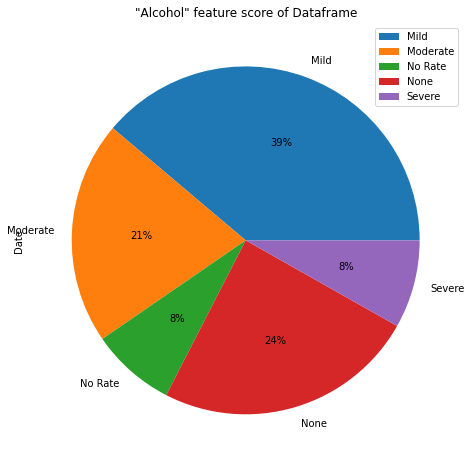

In [16]:
film_Series.groupby(['Nudity']).sum().plot(kind='pie',y='Date',autopct='%1.0f%%',
                title='"Alcohol" feature score of Dataframe', figsize=(8, 8))

In [ ]:
%config IPCompleter.greedy=True

In [ ]:
import findspark
findspark.init()

In [ ]:
#from pyspark import SparkConf
from pyspark import SparkContext

#conf=SparkConf().setMaster("local[*]")
#sc = SparkContext.getOrCreate(conf=conf)
#sc.setCheckpointDir('checkpoint')

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.ml.tuning import TrainValidationSplit, ParamGridBuilder

In [ ]:
spark = SparkSession.builder.master("local[*]").appName('181805069_171805056_181805080').getOrCreate()
sc = spark.sparkContext

In [ ]:
clean_df = spark.read.csv('film_Series.csv', header=True)

In [ ]:
type(clean_df)

In [ ]:
columns = clean_df.columns
columns

In [ ]:
shapeOfDF = clean_df.toPandas().shape
shapeOfDF

In [ ]:
#clean_df.printSchema()

In [ ]:
#clean_df.select("Name").show(11)

In [ ]:
#clean_df.filter((clean_df['Date'] < 2018) & (clean_df['Rate'] > 7) & (clean_df['Votes'] > 200)).show()

In [ ]:
clean_df.groupBy("Type").count().show()

In [ ]:
#df = clean_df.toPandas()

In [ ]:
#clean_df.filter(clean_df.Genre.contains("Animation") & clean_df.Genre.contains("Action")).show()

In [ ]:
import pyspark.sql.functions as f
lst = clean_df.select(f.collect_list('Movie_ID')).first()
movid = [int(i) for i in lst[0]]
movid

In [ ]:
import numpy as np
import pandas as pd
userId = np.random.randint(1,35,(5000,1))
rating = np.random.randint(1,6,(5000,1))
movieId = np.random.choice(movid,(5000,1))
movieId

In [ ]:
len(userId[userId==[35]])

In [ ]:
len(movieId[movieId==3])

In [ ]:
# Creating Rating dataset randomly
userId = [int(i) for i in userId]
movieId = [int(i) for i in movieId]
rating = [int(i) for i in rating]
ratings = pd.DataFrame()
ratings['user_ID'] = userId
ratings['Movie_ID'] = movieId
ratings['Rate'] = rating
ratings

In [ ]:
ratings[ratings.Rate == 5].head(33)

In [ ]:
rating_df = spark.createDataFrame(ratings) 
rating_df.show(11)

In [ ]:
# Create train and test dataset
(train, test) = rating_df.randomSplit([0.7,0.3])
type(test)

In [ ]:
print (train.count() ,test.count())

In [ ]:
# Create  ALS Model
als = ALS(userCol='user_ID', itemCol='Movie_ID', ratingCol ='Rate', seed = 5080)

In [ ]:
# Tune model using paraGridBuilder
param_grid = ParamGridBuilder()\
            .addGrid(als.rank, [10,50,200])\
            .addGrid(als.maxIter,[10,50,200])\
            .addGrid(als.regParam, [0.01, 0.1])\
            .build()
# Define evulator as RMSE
evulator = RegressionEvaluator(metricName="rmse", labelCol="Rate", predictionCol="prediction")

# Build cross validation using TrainValidationSplit
tvs = TrainValidationSplit(
    estimator = als,
    estimatorParamMaps = param_grid,
    evaluator = evulator)

In [ ]:
#ls = train.sample(0.3).collect()
#train = spark.createDataFrame(ls).show()

In [ ]:
train.checkpoint()
# Now, check the size of your DAG
# Displays the  length of physical plan
train.explain(extended=True)

In [ ]:
# Fit ALS model to train data
model = tvs.fit(train)